<a href="https://colab.research.google.com/github/anhnbach/DS1002Work/blob/main/Copy_of_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [24]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ftx = pd.read_csv('https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv', sep=";")
#The original dataset was seperated by ; so I had to split them up into columns to better see the data

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [55]:
print("Rows: " + str(ftx.shape[0]))
print("Columns: " + str (ftx.shape[1]))


Rows: 741
Columns: 11


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [56]:
ftx = ftx.drop_duplicates()
print(ftx.duplicated().sum())
#Droping and checking for how many duplicate values are remaining in the data set

ftx = ftx.drop(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'], axis=1)
#Dropping the required columns and saving the dataframe

print(ftx.isnull().any())
#This code shows that there are no missing values in the dataset since it returned false for all columns. As such, I will not need to fill or remove any rows.

0
open         False
high         False
low          False
close        False
volume       False
timestamp    False
dtype: bool


Now display the first 10 rows of the cleaned dataset.

In [57]:
ftx.head(10)

,open,high,low,close,volume,timestamp
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31T23:59:59.999Z
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z
5,0.894567,1.011183,0.893652,0.930696,7065306.21,2022-12-26T23:59:59.999Z
6,0.924432,0.935517,0.894370,0.894657,2577834.83,2022-12-25T23:59:59.999Z
7,0.957505,0.975671,0.921085,0.924433,5055004.16,2022-12-24T23:59:59.999Z
8,1.027133,1.038282,0.948058,0.957006,17088962.94,2022-12-23T23:59:59.999Z
9,0.873973,1.127198,0.835625,1.027162,22418556.51,2022-12-22T23:59:59.999Z


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [58]:
ftx['close_change'] = ftx['close'].diff()
ftx.head(10)
#I am leaving the first data point in the as NaN since there are no points of data above it to calculate the difference between closing prices.

,open,high,low,close,volume,timestamp,close_change
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31T23:59:59.999Z,NaN
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z,-0.003640
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z,0.021183
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z,0.025860
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z,0.037577
5,0.894567,1.011183,0.893652,0.930696,7065306.21,2022-12-26T23:59:59.999Z,0.007028
6,0.924432,0.935517,0.894370,0.894657,2577834.83,2022-12-25T23:59:59.999Z,-0.036039
7,0.957505,0.975671,0.921085,0.924433,5055004.16,2022-12-24T23:59:59.999Z,0.029776
8,1.027133,1.038282,0.948058,0.957006,17088962.94,2022-12-23T23:59:59.999Z,0.032574
9,0.873973,1.127198,0.835625,1.027162,22418556.51,2022-12-22T23:59:59.999Z,0.070155


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [65]:
sorted_ftx = ftx.sort_values(by = 'close_change', ascending = False)
#Sorting the values in the column close_change in descending order

growth_days = sorted_ftx.head(10)
#Since the values have been sorted in descending order, getting the 10 values from the top should get the top 10 days of positive growth for FTX

print("\n The top 10 days of positive growth for FTX:")
print(growth_days[['timestamp', 'close_change']])
#This line should return only the date and rate of change


 The top 10 days of positive growth for FTX:
                    timestamp  close_change
56   2022-11-07T23:59:59.999Z     16.623292
468  2021-09-16T23:59:59.999Z     14.497738
598  2021-05-18T23:59:59.999Z     14.017812
478  2021-09-15T23:59:59.999Z      9.506381
473  2021-09-19T23:59:59.999Z      8.315742
484  2021-09-09T23:59:59.999Z      6.929033
350  2022-01-20T23:59:59.999Z      6.770635
594  2021-05-22T23:59:59.999Z      6.228516
481  2021-09-12T23:59:59.999Z      5.201864
605  2021-05-11T23:59:59.999Z      5.154806


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [61]:
ftx['rate_change'] = ftx['close_change'].pct_change()
ftx.head(10)
#I am leaving the first 2 rows of close_change as NaN. This is because since the calculations of rate_change are based on close_change, the first row of close_change does not have any previous data available above it to calculate a percentage rate of change and the second row has an NaN row above it so it also can't calculate a percentage rate of change.

,open,high,low,close,volume,timestamp,close_change,rate_change
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31T23:59:59.999Z,NaN,NaN
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z,-0.003640,NaN
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z,0.021183,-6.819104
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z,0.025860,0.220778
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z,0.037577,0.453101
5,0.894567,1.011183,0.893652,0.930696,7065306.21,2022-12-26T23:59:59.999Z,0.007028,-0.812965
6,0.924432,0.935517,0.894370,0.894657,2577834.83,2022-12-25T23:59:59.999Z,-0.036039,-6.127817
7,0.957505,0.975671,0.921085,0.924433,5055004.16,2022-12-24T23:59:59.999Z,0.029776,-1.826211
8,1.027133,1.038282,0.948058,0.957006,17088962.94,2022-12-23T23:59:59.999Z,0.032574,0.093963
9,0.873973,1.127198,0.835625,1.027162,22418556.51,2022-12-22T23:59:59.999Z,0.070155,1.153732


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [21]:
sorted_pct = ftx.sort_values(by ='rate_change', ascending = False)
#Sorting the values in the column rate_change in descending order

top_5 = sorted_pct.head(5)
#Getting the 5 values at the top after sorting by descending order should get the top 5 days of greatest positive rate change

bottom_5 = sorted_pct.tail(7)
bottom_5 = bottom_5.dropna()
#I had to get the bottom 7 values of sorted_pct since it had 2 values of NaN. I then removed these 2 NaN values so I could get a representative list of the top 5 days of greatest negative change.

print("\n Top 5 days of greatest positive rate change:")
print(top_5[['timestamp', 'rate_change']])
#This line should return only the date and rate of change

print("\n Top 5 days of greatest negative rate change:")
print(bottom_5[['timestamp', 'rate_change']])
#This line should return only the date and rate of change


 Top 5 days of greatest positive rate change:
                    timestamp  rate_change
110  2022-09-14T23:59:59.999Z   273.028254
516  2021-08-08T23:59:59.999Z   216.674634
182  2022-07-06T23:59:59.999Z   178.229185
369  2021-12-31T23:59:59.999Z    97.180950
216  2022-06-02T23:59:59.999Z    58.778546

 Top 5 days of greatest negative rate change:
                    timestamp  rate_change
306  2022-03-05T23:59:59.999Z   -79.028500
193  2022-06-25T23:59:59.999Z   -83.605800
446  2021-10-15T23:59:59.999Z  -166.691725
240  2022-05-10T23:59:59.999Z  -370.048919
135  2022-08-20T23:59:59.999Z -1146.635171


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

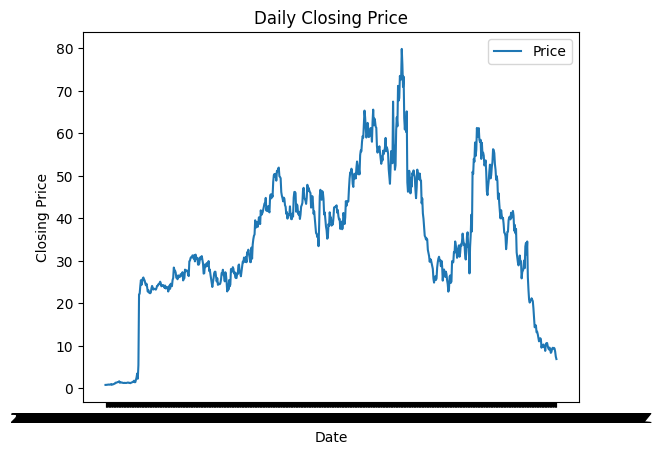

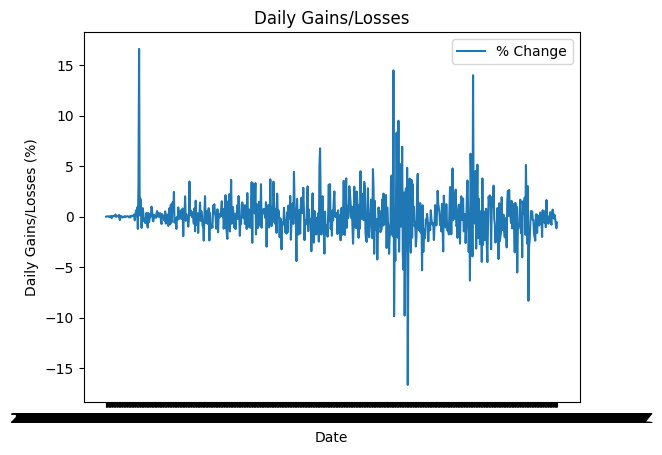

In [64]:
plt.plot(ftx['timestamp'], ftx['close'], label = 'Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Daily Closing Price')
plt.legend()
plt.show()
#This is to graph a line plot of the daily closing price

plt.plot(ftx['timestamp'], ftx['close_change'], label = '% Change')
plt.xlabel('Date')
plt.ylabel('Daily Gains/Losses (%)')
plt.title('Daily Gains/Losses')
plt.legend()
plt.show()
#This is to graph a line plot of the % change in daily gains/losses

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

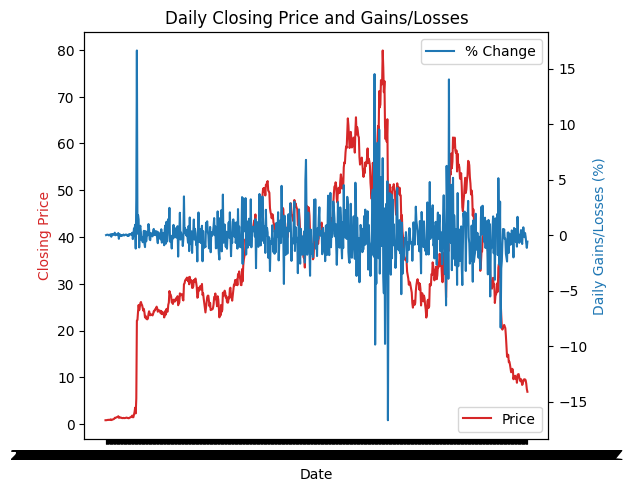

In [63]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color = color)
ax1.plot(ftx['timestamp'], ftx['close'], color = color, label = 'Price')
#Using red to graph a line plot and label the y-axis of the daily closing price
plt.legend()
plt.legend(loc='lower right')
#I had to move the legend of this line to the bottom right so that it would be visible and not layed over by the gains/losses legend

ax2 = ax1.twinx()

color2 = 'tab:blue'
ax2.set_ylabel('Daily Gains/Losses (%)', color = color2)
ax2.plot(ftx['timestamp'], ftx['close_change'], color = color2, label = '% Change')
#Using blue to graph a line plot and label the y-axis of the daily gains/losses

fig.tight_layout()
plt.title('Daily Closing Price and Gains/Losses')
plt.legend()
plt.show()
